In [1]:
from yaps import parse_model
import numpy
import pystan
import sys

def dummy_type(**kwargs):
    class DummyList:
        def __getitem__(self, key):
            return None
    return DummyList()

int = dummy_type

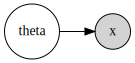

In [2]:
def coin_model_py(x: int(lower=0, upper=1)[10]):
    theta: real(lower=0, upper=1)
    theta = ~ uniform(0, 1)
    for i in range(10):
        x[i] =~ bernoulli(theta)

coin_model_viz, coin_model_stan = parse_model(coin_model_py)

coin_model_viz

In [3]:
real = [1,2,3]
N = 0
def yaps(fn):
    pass

@yaps
def slicstan_example(N: int, y: real[N]):
    with parameters:
        tau: real <~ gamma(0.1, 0.1)
        mu: real <~ normal(0, 1)
    with transformed_parameters:
        sigma: real = pow(tau, -0.5)
    with model:
        y <~ normal(mu, sigma)
        v: gquant(real) = pow(sigma, 2)

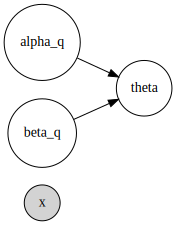

In [4]:
def coin_guide_py(x: int(lower=0, upper=1)[10]):
    alpha_q: real(lower=0, variational=True)
    beta_q: real(lower=0, variational=True)
    theta =~ beta(alpha_q, beta_q)

coin_guide_viz, coin_guide_stan = parse_model(coin_guide_py)

coin_guide_viz

In [5]:
print(coin_model_stan)

data {
  int<lower=0, upper=1> x[10];
}
parameters {
  real<lower=0, upper=1> theta;
}
model {
  theta ~ uniform(0, 1);
  for (i in 1:10)
    x[i] ~ bernoulli(theta);
}


In [7]:
data = {'x': [0, 1, 0, 0, 0, 0, 0, 0, 0, 1]}

fit = pystan.stan(model_code=coin_model_stan, data=data, iter=1000)

samples = fit.extract()['theta']

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_23c02817c2eb1a7a80f12fd5acdd643e NOW.


In [8]:
print("Posterior mean:", numpy.mean(samples))
print("Posterior stddev:", numpy.std(samples))

Posterior mean: 0.2522495058219269
Posterior stddev: 0.12107639770715897
